<a href="https://colab.research.google.com/github/shaniklein/DL-and-its-applications-to-signal-and-imgae-prosccessing-ass1-/blob/main/Assignment_2_Load_COVID_19_coarse.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TensorFlow Data Loading & Classification - COVID-19 


**Deep Learning and Its Applications to Signal and Image Processing and Analysis, 361-2-1120**

**Ron Sofer - soferron@post.bgu.ac.il**

**Tal Ben Haim - benhait@post.bgu.ac.il**


In the following assignment we will create a dataset and costum model for classification of pneumonia cases.
We will try two types of classification - coarse classification to 3 classes (Bacterial, Viral, Fungal), and fine classification to each of the genus/specesies type of pneumonia.

The assignment will hopefully give you the to[link text](https://)ols needed to create a dataset for your own research challanges.




# The data
Import some basic packages

In [2]:
import tensorflow as tf
import IPython.display as display
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import os
import pandas as pd
from pathlib import Path

Clone COVID-19 X-Ray dataset repository

https://github.com/ieee8023/covid-chestxray-dataset

The data consists of X-ray images of pneumonia cases gathered from different sources. The data is updated on an almost daily basis.

Please refer to the link to read about the given data.
Additional info can be found in the dataset paper :
https://arxiv.org/abs/2003.11597


In [3]:
#We can use "!" to run bash commands in google colab
#The following command will download the latest available data from the git repository
!git clone https://github.com/ieee8023/covid-chestxray-dataset.git

Cloning into 'covid-chestxray-dataset'...
remote: Enumerating objects: 3641, done.
remote: Counting objects: 100% (12/12), done.
remote: Compressing objects: 100% (10/10), done.
remote: Total 3641 (delta 4), reused 6 (delta 2), pack-reused 3629
Receiving objects: 100% (3641/3641), 632.97 MiB | 36.99 MiB/s, done.
Resolving deltas: 100% (1446/1446), done.
Checking out files: 100% (1174/1174), done.


Set images and metadata files path and examine data

In [4]:
images_path = Path("covid-chestxray-dataset/images")
metadata_path = Path("covid-chestxray-dataset/metadata.csv")

We use pandas to convert the metadata CSV to a dataframe object.

If you are unfamiliar with pandas please refer to:

https://pandas.pydata.org/pandas-docs/stable/getting_started/10min.html

In [5]:
metadata = pd.read_csv(metadata_path)

A look at the metadata:

You can read the paper for description of the data contents. 

In [6]:
metadata.head(3)

,patientid,offset,sex,age,finding,RT_PCR_positive,survival,intubated,intubation_present,went_icu,in_icu,needed_supplemental_O2,extubated,temperature,pO2_saturation,leukocyte_count,neutrophil_count,lymphocyte_count,view,modality,date,location,folder,filename,doi,url,license,clinical_notes,other_notes,Unnamed: 29
0,2,0.0,M,65.0,Pneumonia/Viral/COVID-19,Y,Y,N,N,N,N,Y,NaN,NaN,NaN,NaN,NaN,NaN,PA,X-ray,"January 22, 2020","Cho Ray Hospital, Ho Chi Minh City, Vietnam",images,auntminnie-a-2020_01_28_23_51_6665_2020_01_28_...,10.1056/nejmc2001272,https://www.nejm.org/doi/full/10.1056/NEJMc200...,NaN,"On January 22, 2020, a 65-year-old man with a ...",NaN,NaN
1,2,3.0,M,65.0,Pneumonia/Viral/COVID-19,Y,Y,N,N,N,N,Y,NaN,NaN,NaN,NaN,NaN,NaN,PA,X-ray,"January 25, 2020","Cho Ray Hospital, Ho Chi Minh City, Vietnam",images,auntminnie-b-2020_01_28_23_51_6665_2020_01_28_...,10.1056/nejmc2001272,https://www.nejm.org/doi/full/10.1056/NEJMc200...,NaN,"On January 22, 2020, a 65-year-old man with a ...",NaN,NaN
2,2,5.0,M,65.0,Pneumonia/Viral/COVID-19,Y,Y,N,N,N,N,Y,NaN,NaN,NaN,NaN,NaN,NaN,PA,X-ray,"January 27, 2020","Cho Ray Hospital, Ho Chi Minh City, Vietnam",images,auntminnie-c-2020_01_28_23_51_6665_2020_01_28_...,10.1056/nejmc2001272,https://www.nejm.org/doi/full/10.1056/NEJMc200...,NaN,"On January 22, 2020, a 65-year-old man with a ...",NaN,NaN


In [7]:
#List the images
list(images_path.glob("*"))[0:10]

[PosixPath('covid-chestxray-dataset/images/2168a917.jpg'),
 PosixPath('covid-chestxray-dataset/images/all14238-fig-0001-m-c.jpg'),
 PosixPath('covid-chestxray-dataset/images/16660_2_1.jpg'),
 PosixPath('covid-chestxray-dataset/images/pneumocystis-jirovecii-pneumonia-3-1.jpg'),
 PosixPath('covid-chestxray-dataset/images/ryct.2020003.fig2-c.png'),
 PosixPath('covid-chestxray-dataset/images/2086b9e1.jpg'),
 PosixPath('covid-chestxray-dataset/images/93FE0BB1-022D-4F24-9727-987A07975FFB.jpeg'),
 PosixPath('covid-chestxray-dataset/images/000004-3.png'),
 PosixPath('covid-chestxray-dataset/images/11547_2020_1203_Fig2_HTML-b.png'),
 PosixPath('covid-chestxray-dataset/images/1-s2.0-S1341321X20301124-gr3_lrg-b.png')]

Visualize some cases

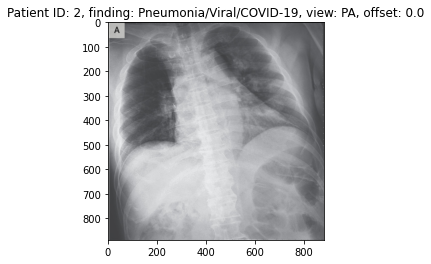

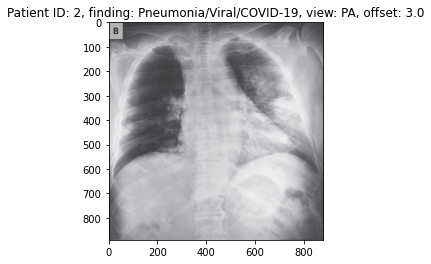

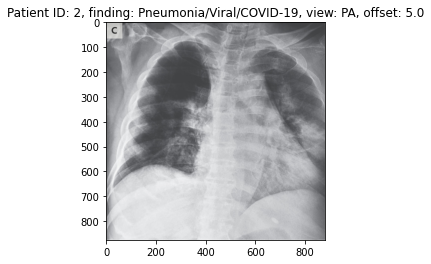

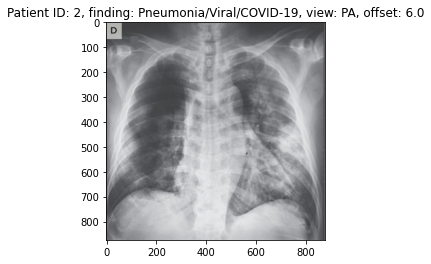

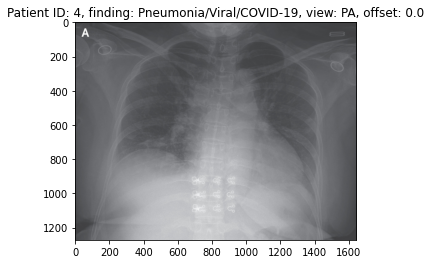

In [8]:
for index, case in metadata.head(5).iterrows():
  image_path = images_path / case["filename"]
  plt.figure()
  plt.title("Patient ID: {0}, finding: {1}, view: {2}, offset: {3}".format(case["patientid"],case["finding"],case["view"],case["offset"]))
  plt.imshow(plt.imread(image_path),cmap='gray')
plt.show()

# Process the data
Write your own code to filter the metadata dataframe to contain only posteroanterior - "PA" (back-to-front) views.

Return a dataframe that contains finding/full filepath as in the following figure: 
<table>
  <tr>
    <th></th>
    <th>finding</th>
    <th>filepath</th>
  </tr>
  <tr>
    <td>0</td>
    <td>Pneumonia/Viral/COVID-19</td>
    <td>some/file/path</td>
  </tr>
  <tr>
    <td>1</td>
    <td>Pneumonia/Viral/COVID-19</td>
    <td>another/file/path</td>
  </tr>
    <tr>
    <td>2</td>
    <td>Pneumonia/Viral/SARS</td>
    <td>some/other/file/path</td>
  </tr>
    <tr>
    <td>...</td>
    <td>...</td>
    <td>...</td>
  </tr>
        <tr>
    <td>...</td>
    <td>...</td>
    <td>...</td>
  </tr>
       <tr>
    <td>...</td>
    <td>...</td>
    <td>...</td>
  </tr>
        <tr>
    <td>...</td>
    <td>...</td>
    <td>...</td>
  </tr>
       <tr>
    <td>...</td>
    <td>...</td>
    <td>...</td>
  </tr>
       <tr>
    <td>...</td>
    <td>...</td>
    <td>...</td>
  </tr>
        <tr>
    <td>...</td>
    <td>...</td>
    <td>...</td>
  </tr>
</table>

In [9]:
def proccess_data(metadata):
  # filter only 'PA'
  new_metadata = metadata[metadata['view'] == 'PA']
  new_metadata = new_metadata[['finding','filename']]
  # make full path to file name
  new_metadata['filename'] = str(images_path) + '/' +new_metadata["filename"].astype(str) 
  new_metadata=new_metadata.rename(columns={'filename':'filepath'},inplace=False)
  return new_metadata

In [10]:
new_metadata=proccess_data(metadata)
new_metadata.head()

,finding,filepath
0,Pneumonia/Viral/COVID-19,covid-chestxray-dataset/images/auntminnie-a-20...
1,Pneumonia/Viral/COVID-19,covid-chestxray-dataset/images/auntminnie-b-20...
2,Pneumonia/Viral/COVID-19,covid-chestxray-dataset/images/auntminnie-c-20...
3,Pneumonia/Viral/COVID-19,covid-chestxray-dataset/images/auntminnie-d-20...
4,Pneumonia/Viral/COVID-19,covid-chestxray-dataset/images/nejmc2001573_f1...


**Add label column to data**

Convert findings from string to numeric classes, using the following dictionary:


```
finding_to_label = {'No Finding':0,
 'Pneumonia':1,
 'Pneumonia/Aspiration':2,
 'Pneumonia/Bacterial':3,
 'Pneumonia/Bacterial/Chlamydophila':4,
 'Pneumonia/Bacterial/E.Coli':5,
 'Pneumonia/Bacterial/Klebsiella':6,
 'Pneumonia/Bacterial/Legionella':7,
 'Pneumonia/Bacterial/Mycoplasma':8,
 'Pneumonia/Bacterial/Nocardia':9,
 'Pneumonia/Bacterial/Staphylococcus/MRSA':10,
 'Pneumonia/Bacterial/Streptococcus':11,
 'Pneumonia/Fungal/Aspergillosis':12,
 'Pneumonia/Fungal/Pneumocystis':13,
 'Pneumonia/Lipoid':14,
 'Pneumonia/Viral/COVID-19':15,
 'Pneumonia/Viral/Herpes ':16,
 'Pneumonia/Viral/Influenza':17,
 'Pneumonia/Viral/Influenza/H1N1':18,
 'Pneumonia/Viral/MERS-CoV':19,
 'Pneumonia/Viral/SARS':20,
 'Pneumonia/Viral/Varicella':21,
 'Tuberculosis':22,
 'Unknown':23,
 'todo':24}
label_to_finding = {v: k for k, v in finding_to_label.items()}
```

You should add two new columns to the dataframe contains labels for each classficaion task mentioned above (coarse and fine)

Validate your data. Are there any cases with invalid class?

Drop meaningless labels (and their corresponding row), explain your choices.




### Dropping meaningless labels
First lets take a look at our labels and their occurrences

In [11]:
from collections import Counter
c=Counter(new_metadata['finding'])
findings_count =pd.DataFrame.from_dict(c, orient='index').reset_index()
findings_count=findings_count.rename(columns = {"index":"finding",0:"count"}, inplace = False)
findings_count

,finding,count
0,Pneumonia/Viral/COVID-19,196
1,Pneumonia,38
2,Pneumonia/Viral/SARS,8
3,Pneumonia/Fungal/Pneumocystis,21
4,Pneumonia/Bacterial/Streptococcus,12
5,No Finding,10
6,Pneumonia/Bacterial/Chlamydophila,1
7,Pneumonia/Bacterial/Klebsiella,7
8,Pneumonia/Bacterial/Legionella,4
9,Pneumonia/Lipoid,4


We can tell that the dataset is super imbalanced! We will deal with it later on .
But first, We can tell there are some labels such as “Pneumonia/Fungal/Aspergillosis” that has only 1 occurrence hence when splitting the dataset to train and test the image may be only on training so we cannot test the model accuracy on that label or only on testing and of course we will get zero accuracy per this label .

In [12]:
# build  a list of labels we want to ommit
drop_them=['todo']
# we will add findigns with only 1 image to the dropp list
drop_them+=(list(findings_count[findings_count['count']==1]['finding']))
drop_them

['todo',
 'Pneumonia/Bacterial/Chlamydophila',
 'Pneumonia/Viral/Influenza',
 'Pneumonia/Viral/Influenza/H1N1',
 'Pneumonia/Fungal/Aspergillosis',
 'Pneumonia/Bacterial/Staphylococcus/MRSA']

In [13]:
# new meta data without the dropped columns
droped_metadata = new_metadata[~new_metadata.finding.isin(drop_them)]
droped_metadata

,finding,filepath
0,Pneumonia/Viral/COVID-19,covid-chestxray-dataset/images/auntminnie-a-20...
1,Pneumonia/Viral/COVID-19,covid-chestxray-dataset/images/auntminnie-b-20...
2,Pneumonia/Viral/COVID-19,covid-chestxray-dataset/images/auntminnie-c-20...
3,Pneumonia/Viral/COVID-19,covid-chestxray-dataset/images/auntminnie-d-20...
4,Pneumonia/Viral/COVID-19,covid-chestxray-dataset/images/nejmc2001573_f1...
...,...,...
932,Pneumonia/Viral/COVID-19,covid-chestxray-dataset/images/16953_4_1.jpg
933,Pneumonia/Viral/COVID-19,covid-chestxray-dataset/images/16953_5_1.jpg
936,Pneumonia/Viral/COVID-19,covid-chestxray-dataset/images/2edb88df42cab5e...
939,Pneumonia/Viral/COVID-19,covid-chestxray-dataset/images/16865_1_1.jpg


Next, we want to add 2 columns of coarse and test labels . So we want to remove any label that cannot be splitted into coarse and fine label such as 'Tuberculosis'.


In [14]:
df=droped_metadata.copy()
temp_df = df['finding'].str.split('/',expand=True)
df['name'],df['coarse'],df['fine'] = temp_df[0],temp_df[1],temp_df[2] 
# drop all finding without coarse or fine label
df = df.dropna()
df

,finding,filepath,name,coarse,fine
0,Pneumonia/Viral/COVID-19,covid-chestxray-dataset/images/auntminnie-a-20...,Pneumonia,Viral,COVID-19
1,Pneumonia/Viral/COVID-19,covid-chestxray-dataset/images/auntminnie-b-20...,Pneumonia,Viral,COVID-19
2,Pneumonia/Viral/COVID-19,covid-chestxray-dataset/images/auntminnie-c-20...,Pneumonia,Viral,COVID-19
3,Pneumonia/Viral/COVID-19,covid-chestxray-dataset/images/auntminnie-d-20...,Pneumonia,Viral,COVID-19
4,Pneumonia/Viral/COVID-19,covid-chestxray-dataset/images/nejmc2001573_f1...,Pneumonia,Viral,COVID-19
...,...,...,...,...,...
931,Pneumonia/Viral/COVID-19,covid-chestxray-dataset/images/16953_3_1.jpg,Pneumonia,Viral,COVID-19
932,Pneumonia/Viral/COVID-19,covid-chestxray-dataset/images/16953_4_1.jpg,Pneumonia,Viral,COVID-19
933,Pneumonia/Viral/COVID-19,covid-chestxray-dataset/images/16953_5_1.jpg,Pneumonia,Viral,COVID-19
936,Pneumonia/Viral/COVID-19,covid-chestxray-dataset/images/2edb88df42cab5e...,Pneumonia,Viral,COVID-19


In [15]:
# keep only filepath coarse and fine
dataset=df[['filepath','coarse','fine']]
dataset.head()

,filepath,coarse,fine
0,covid-chestxray-dataset/images/auntminnie-a-20...,Viral,COVID-19
1,covid-chestxray-dataset/images/auntminnie-b-20...,Viral,COVID-19
2,covid-chestxray-dataset/images/auntminnie-c-20...,Viral,COVID-19
3,covid-chestxray-dataset/images/auntminnie-d-20...,Viral,COVID-19
4,covid-chestxray-dataset/images/nejmc2001573_f1...,Viral,COVID-19


In [16]:
finding_to_label_coarse={'Bacterial':0, 'Viral':1, 'Fungal':2}
label_to_finding_coarse = {v: k for k, v in finding_to_label_coarse.items()}

In [17]:
fine_labels=list(set(dataset['fine']))
fine_labels.sort() #keep the labels in the same order each time we run we will get the same mapping
finding_to_label_fine=dict((d,i) for i,d in enumerate(fine_labels))
label_to_finding_fine = {v: k for k, v in finding_to_label_fine.items()}
finding_to_label_fine

{'COVID-19': 0,
 'Klebsiella': 1,
 'Legionella': 2,
 'MERS-CoV': 3,
 'Mycoplasma': 4,
 'Nocardia': 5,
 'Pneumocystis': 6,
 'SARS': 7,
 'Streptococcus': 8,
 'Varicella': 9}

In [18]:
# map labels to their numeric value
dataset = dataset.replace(finding_to_label_coarse)
dataset = dataset.replace(finding_to_label_fine)
dataset

,filepath,coarse,fine
0,covid-chestxray-dataset/images/auntminnie-a-20...,1,0
1,covid-chestxray-dataset/images/auntminnie-b-20...,1,0
2,covid-chestxray-dataset/images/auntminnie-c-20...,1,0
3,covid-chestxray-dataset/images/auntminnie-d-20...,1,0
4,covid-chestxray-dataset/images/nejmc2001573_f1...,1,0
...,...,...,...
931,covid-chestxray-dataset/images/16953_3_1.jpg,1,0
932,covid-chestxray-dataset/images/16953_4_1.jpg,1,0
933,covid-chestxray-dataset/images/16953_5_1.jpg,1,0
936,covid-chestxray-dataset/images/2edb88df42cab5e...,1,0


In [19]:
dataset.head(15)

,filepath,coarse,fine
0,covid-chestxray-dataset/images/auntminnie-a-20...,1,0
1,covid-chestxray-dataset/images/auntminnie-b-20...,1,0
2,covid-chestxray-dataset/images/auntminnie-c-20...,1,0
3,covid-chestxray-dataset/images/auntminnie-d-20...,1,0
4,covid-chestxray-dataset/images/nejmc2001573_f1...,1,0
5,covid-chestxray-dataset/images/nejmc2001573_f1...,1,0
7,covid-chestxray-dataset/images/lancet-case2a.jpg,1,0
8,covid-chestxray-dataset/images/lancet-case2b.jpg,1,0
12,covid-chestxray-dataset/images/SARS-10.1148rg....,1,7
13,covid-chestxray-dataset/images/SARS-10.1148rg....,1,7


**Split Data**

Split your data randomly to train (80%) and validation (20%) dataframes (use random seed for repreduciable results).

Now we can tell already that the dataset in imbalanced. Hence when splitting the data we would like to have same the percentage of samples for each class. For example, for label with only 30 occurrences we wouldn’t want that all 30 occurrences will be in the training \ testing data. So  for splitting the data we used StratifiedShuffleSplit method which returns stratified and shuffled sets. The set are made by preserving the percentage of samples for each class.
.


In [21]:
# coarse
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_valid_index in split.split(dataset, dataset.coarse):
    train = dataset.iloc[train_index]
    valid_set = dataset.iloc[test_valid_index]


In [54]:
# fine
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_valid_index in split.split(dataset, dataset.fine):
    train_fine = dataset.iloc[train_index]
    valid_fine = dataset.iloc[test_valid_index]


Lets look at each dataset histogram according to coarse label:


[(1, 169), (0, 25), (2, 17)]
(1, 0, 2)
[(1, 43), (0, 6), (2, 4)]
(1, 0, 2)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: MatplotlibDeprecationWarning: Passing the minor parameter of set_xticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  


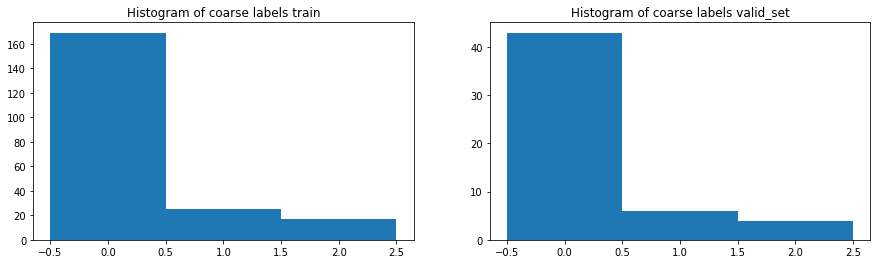

In [22]:
datas=['train','valid_set']
i=0
fig, axes = plt.subplots(1,2)
for df in [train,valid_set]:
  c=Counter(df['coarse'])
  print(c.most_common(10))

  labels, values = zip(*c.items())
  print(labels)
  indexes = np.arange(len(labels))
  width = 1
 
  axes[i].bar(indexes, values, width)
  axes[i].set_xticks(indexes + width * 0.5, labels)
  axes[i].set_title('Histogram of coarse labels '+datas[i] )
  i+=1
fig.set_figwidth(15)
plt.show()


[(0, 157), (6, 17), (8, 10), (7, 6), (1, 6), (3, 3), (5, 3), (9, 3), (4, 3), (2, 3)]
(0, 8, 6, 3, 7, 1, 5, 9, 4, 2)
[(0, 39), (6, 4), (8, 2), (7, 2), (9, 1), (1, 1), (5, 1), (4, 1), (2, 1), (3, 1)]
(0, 8, 9, 1, 5, 4, 7, 2, 6, 3)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: MatplotlibDeprecationWarning: Passing the minor parameter of set_xticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  


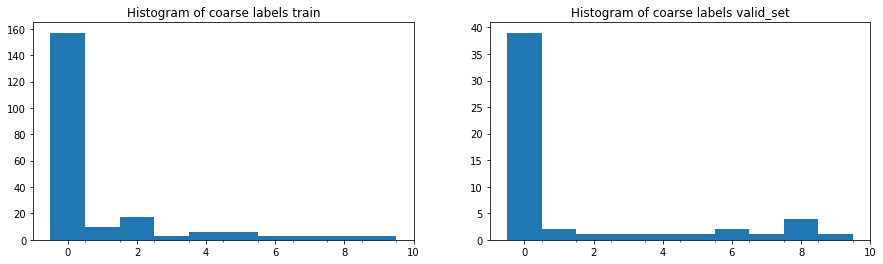

In [55]:
datas=['train','valid_set']
i=0
fig, axes = plt.subplots(1,2)
for df in [train_fine,valid_fine]:
  c=Counter(df['fine'])
  print(c.most_common(10))

  labels, values = zip(*c.items())
  print(labels)
  indexes = np.arange(len(labels))
  width = 1
 
  axes[i].bar(indexes, values, width)
  axes[i].set_xticks(indexes + width * 0.5, labels)
  axes[i].set_title('Histogram of coarse labels '+datas[i] )
  i+=1
fig.set_figwidth(15)
plt.show()


We got the same Distribution ! 

**Dealing with imbalance data**
We observe 3 methods , all methods was preformed solely on train data:


*  **Over sampling:** we  added more copies of the minority classes by duplicate them . After getting results from the model when using over-sampled data the model guessed only label 1 so we figure out that that we may have same distribution but the other labels has many duplicated so the model was still over-fitted to match all labels as the majority class so will present the algorithm we did but we will continue with other method .

*  **Under sampling:** we thought about sample only 20 samples of “Viral” label so we get similar distribution but 20 samples out of 120 mean through away a lot of information and we did not want it .


* **Class weights:** we want that the training algorithm will consider the skewed distribution of the classes, without change the data itself. This can be achieved by giving different weights to both the majority and minority classes. The difference in weights will influence the classification of the classes during the training phase. The whole purpose is to penalize the misclassification made by the minority class by setting a higher-class weight and at the same time reducing weight for the majority class.







#### Over Sampling ###
We add more copies of the minority classes by duplicate them Of course we are doing it only on the train set to avoid case when we have the same image in both train and test set.

In [23]:
c=Counter(train['coarse'])
# label 1 is corona it is the majority class

majority_count=c[1]
# create a new copy of the data 
new_train=train.copy()

for label in set(new_train['coarse']):
  # we wont duplicate sample from majority class
  if label == 1:
    continue
  # get all data for the specific label
  label_df=new_train[new_train['coarse']==int(label)]
  # create factor to duplicat = majority_count / label count
  factor_label=int(majority_count/c[label])
  # duplicate
  temp=pd.concat([label_df]*factor_label, ignore_index=True) 
  new_train=pd.concat([new_train,temp],ignore_index=True)

[(0, 175), (2, 170), (1, 169)]


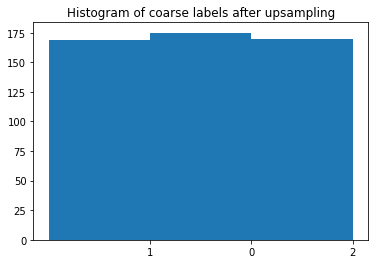

In [24]:
c=Counter(new_train['coarse'])
c.most_common(10)
print(c.most_common(10))

labels, values = zip(*c.items())

indexes = np.arange(len(labels))
width = 1

plt.bar(indexes, values, width)
plt.xticks(indexes + width * 0.5, labels)
plt.title('Histogram of coarse labels after upsampling')
plt.show()

We succeed in our over sampling!

#### Class weight ###
We want that the training algorithm will consider the skewed distribution of the classes, without change the data itself. This can be achieved by giving different weights to both the majority and minority classes. The difference in weights will influence the classification of the classes during the training phase. The whole purpose is to penalize the misclassification made by the minority class by setting a higher-class weight and at the same time reducing weight for the majority class.


In [25]:
from sklearn.utils import class_weight
class_weights = class_weight.compute_class_weight('balanced',
                                                 np.unique(dataset['coarse']),
                                                 dataset['coarse'])

In [26]:
class_weights

array([2.83870968, 0.41509434, 4.19047619])

In [51]:
from sklearn.utils import class_weight
class_weights_fine = class_weight.compute_class_weight('balanced',
                                                 np.unique(dataset['fine']),
                                                 dataset['fine'])

In [52]:
class_weights_fine

array([0.13469388, 3.77142857, 6.6       , 6.6       , 6.6       ,
       6.6       , 1.25714286, 3.3       , 2.2       , 6.6       ])

# Create tf.Dataset
Create a tf.Dataset object from the train data, in which every entry has the label and the image.
Repeat for validation data.

Steps:
1.   Create a tf.dataset object from the dataframe. [1]
2.   Write a function that parse the data from each dataset entry to class/image [2]
3.   Apply the function on the dataset using tf.Dataset.map [2]

See:

[1] tf.dataset from pandas dataframe : https://www.tensorflow.org/tutorials/load_data/pandas_dataframe#load_data_using_tfdatadataset
[2] Image loading : https://www.tensorflow.org/tutorials/load_data/images#load_using_tfdata

* **Step 1 - Create a tf.dataset object from the dataframe, each entry should contain filename and class.**

In [27]:
## Fill in your code
train_ds_coarse = tf.data.Dataset.from_tensor_slices((train['filepath'].values, train['coarse'].values))
val_ds_coarse = tf.data.Dataset.from_tensor_slices((valid_set['filepath'].values, valid_set['coarse'].values))

In [56]:
train_ds_fine = tf.data.Dataset.from_tensor_slices((train_fine['filepath'].values, train_fine['fine'].values))
val_ds_fine = tf.data.Dataset.from_tensor_slices((valid_fine['filepath'].values, valid_fine['fine'].values))

  Test your dataset object:

In [28]:
for filename, label in train_ds_coarse.take(5):
  print ('Filename: {}, Label: {}'.format(filename, label))

Filename: b'covid-chestxray-dataset/images/wong-0004.jpg', Label: 1
Filename: b'covid-chestxray-dataset/images/radiol.2020200490.fig3.jpeg', Label: 1
Filename: b'covid-chestxray-dataset/images/covid-19-pneumonia-15-PA.jpg', Label: 1
Filename: b'covid-chestxray-dataset/images/ec083e35.jpg', Label: 1
Filename: b'covid-chestxray-dataset/images/16672_1_1.jpg', Label: 1


* **Step 2 - Write a function to parse the image file name and return a grayscale image , resized to 512X512**.

> The mapping function will run each time a batch is fetched. the input is your dataset entry - (filepath,label) and the output should be (img,label).
\
Note that once the you read the image using tensorflow (tf.io.read_file), your operations should be on Tensors. 

> You can use a mapping function to tranform the data randomly each time a batch is fetched for data augmentation. 
https://www.tensorflow.org/tutorials/images/data_augmentation


In [29]:
RESIZE_SHAPE = [512,512]

In [30]:
### Student code
def decode_img(img):
  ### Fill in your code
  img = tf.image.decode_jpeg(img, channels=1)
  img= float(img)/255
  img= tf.image.convert_image_dtype(img,tf.float32)
  img = tf.image.resize(img,RESIZE_SHAPE)

  return img

def map_function(filename,label):
  img = tf.io.read_file(filename)
  decoded_img = decode_img(img)
  return (decoded_img, label)

* Step 3 - Apply the mapping function on the dataset

In [31]:
### Fill in your code
train_ds_coarse = train_ds_coarse.map(map_function)
val_ds_coarse = val_ds_coarse.map(map_function)


In [57]:
train_ds_fine = train_ds_fine.map(map_function)
val_ds_fine = val_ds_fine.map(map_function)

Test your dataset:

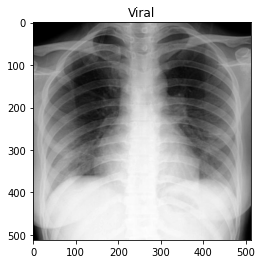

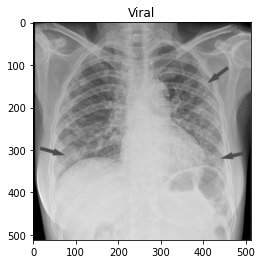

In [32]:
for image, label in train_ds_coarse.take(2):
  plt.figure()
  plt.imshow(image.numpy().squeeze(),cmap='gray')
  plt.title(label_to_finding_coarse[label.numpy()])
plt.show()

Repeat the steps for the validation set.

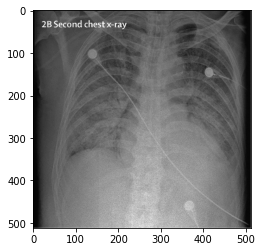

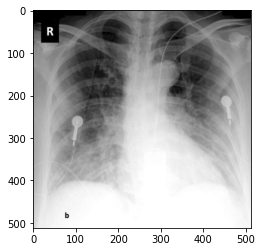

In [33]:
for image, label in val_ds_coarse.take(2):
    plt.figure()
    plt.imshow(image.numpy().squeeze(),cmap='gray')
plt.show()

**Data Augmentation**

Now, we want to add data augmentation to the training set.



\
Write a function that operates on entries of your dataset, and augments them, and then apply this function to your dataset.

You can use functions from tf.image.random_* to randomly augment your data as you process it.
For example, to randomly flip your image:

```
  img = tf.image.random_flip_left_right(img)
```



In [58]:
# create rotation matrix 
def transform_rotation(image, height, rotation):
    # input image - is one image of size [dim,dim,1]
    # output - image randomly rotated
    DIM = height
    XDIM = DIM%2 #fix for size 331
    
    rotation = rotation * tf.random.uniform([1],dtype='float32')
    # CONVERT DEGREES TO RADIANS
    rotation = math.pi * rotation / 180.
    
    # ROTATION MATRIX
    c1 = tf.math.cos(rotation)
    s1 = tf.math.sin(rotation)
    one = tf.constant([1],dtype='float32')
    zero = tf.constant([0],dtype='float32')
    rotation_matrix = tf.reshape(tf.concat([c1,s1,zero, -s1,c1,zero, zero,zero,one],axis=0),[3,3])

    # LIST DESTINATION PIXEL INDICES
    x = tf.repeat( tf.range(DIM//2,-DIM//2,-1), DIM )
    y = tf.tile( tf.range(-DIM//2,DIM//2),[DIM] )
    z = tf.ones([DIM*DIM],dtype='int32')
    idx = tf.stack( [x,y,z] )
    
    # ROTATE DESTINATION PIXELS ONTO ORIGIN PIXELS
    idx2 = K.dot(rotation_matrix,tf.cast(idx,dtype='float32'))
    idx2 = K.cast(idx2,dtype='int32')
    idx2 = K.clip(idx2,-DIM//2+XDIM+1,DIM//2)
    
    # FIND ORIGIN PIXEL VALUES 
    idx3 = tf.stack( [DIM//2-idx2[0,], DIM//2-1+idx2[1,]] )
    d = tf.gather_nd(image, tf.transpose(idx3))
        
    return tf.reshape(d,[DIM,DIM,1])

In [59]:
import math
import tensorflow.keras.backend as K

SIZE=512
def augmentation(image,label):
  p_rotation = tf.random.uniform([], 0, 1.0, dtype=tf.float32) 
  p_brightness= tf.random.uniform([], 0, 1.0, dtype=tf.float32)
  p_contrast= tf.random.uniform([], 0, 1.0, dtype=tf.float32)
  p_crop= tf.random.uniform([], 0, 1.0, dtype=tf.float32)

  rotation_angle = tf.random.uniform([], -30.0, 30.0, dtype=tf.float32)
  if p_crop > .6:
    crop_size = tf.random.uniform([], int(SIZE*.85), SIZE, dtype=tf.int32)
    image = tf.image.random_crop(image, size=[crop_size, crop_size, 1])
    image = tf.image.resize(image, size=[SIZE, SIZE])

  if p_rotation > .3:
    image = transform_rotation(image, SIZE, rotation=rotation_angle)
  if p_brightness >= .4:
      image = tf.image.grayscale_to_rgb(image)
      image = tf.image.random_brightness(image, max_delta=.5)
      image=tf.image.rgb_to_grayscale(image)
  if p_contrast >= .4:
      image = tf.image.grayscale_to_rgb(image)
      image = tf.image.random_contrast(image, lower=.3, upper=1.2)
      image=tf.image.rgb_to_grayscale(image)
  return image,label

In [36]:
train_ds_coarse = train_ds_coarse.map(augmentation)


In [60]:
train_ds_fine=train_ds_fine.map(augmentation)

Test your data augmentation.
\
We will process the same entry several times and should see different results.

TypeError: ignored

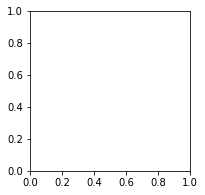

In [86]:
subset = train_ds_coarse.take(1)
plt.figure(figsize=(10,10))
for i in range (9):
  image, label = next(iter(subset))
  ax = plt.subplot(3,3,i+1)
  plt.imshow(image.numpy().squeeze(),cmap='gray')
  plt.axis('off')
plt.show()

we didn't want use flip left right becasue their is a different between the left and the right lung. We chose to do rotation - randonly chose number between -30 and 30 and turn that imgae in that angle .
The main idead behind it is that the images can be in a litte angle and not fully sraight .

In addition we tried to augment in pixle level such as brightness and contrast. Due to the face that the images are gray-scaled the changes are not so significant.

Last - we randomly cut 85% of the image. That way the model can focus on the lungs itself and not the X-ray labels the on the corner of the images.

# Prepare datasets for training
So far we defined datasets that can be used for training, but are not yet ready to process large amounts of data fast.

\\
We would like to make our dataset ready for fast batch processing.
The following function does that:
*   Cache your data - load it to your RAM/save it to file for faster access.
*   Shuffle your data.
*   Repeat the data - makes the iterator cyclic, so it will be repeated after each epoch, making an "infinite" dataset. This may be ommited, but the training process may differ.
*   Batch the data - fetch the data in batches, each batch has batch_size entries.
*   Prefetch the data - while you process one batch, the CPU will prefetch the next batches (including preprocessing and augmentations)


for further reading - https://www.tensorflow.org/guide/data


In [38]:
#Source https://www.tensorflow.org/tutorials/load_data/images#load_using_tfdata
def prepare_for_training(ds,batch_size=32, cache=True, shuffle_buffer_size=1000):
  # This is a small dataset, only load it once, and keep it in memory.
  # use `.cache(filename)` to cache preprocessing work for datasets that don't
  # fit in memory.
  if cache:
    if isinstance(cache, str):
      ds = ds.cache(cache)
    else:
      ds = ds.cache()

  ds = ds.shuffle(buffer_size=shuffle_buffer_size)

  # Repeat forever
  ds = ds.repeat()

  ds = ds.batch(batch_size)

  # `prefetch` lets the dataset fetch batches in the background while the model
  # is training.
  ds = ds.prefetch(buffer_size=tf.data.experimental.AUTOTUNE)

  return ds

In [39]:
#Apply on your dataset
train_ds_coarse = prepare_for_training(train_ds_coarse)
val_ds_coarse = prepare_for_training(val_ds_coarse)

In [61]:
#Apply on your dataset
train_ds_fine = prepare_for_training(train_ds_fine)
val_ds_fine = prepare_for_training(val_ds_fine)

Visualize results

In [40]:
def show_batch(image_batch, label_batch):
  plt.figure(figsize=(10,10))
  for n in range(25):
      ax = plt.subplot(5,5,n+1)
      plt.imshow(image_batch[n],cmap='gray')
      plt.title(label_to_finding_coarse[label_batch[n]])
      plt.axis('off')

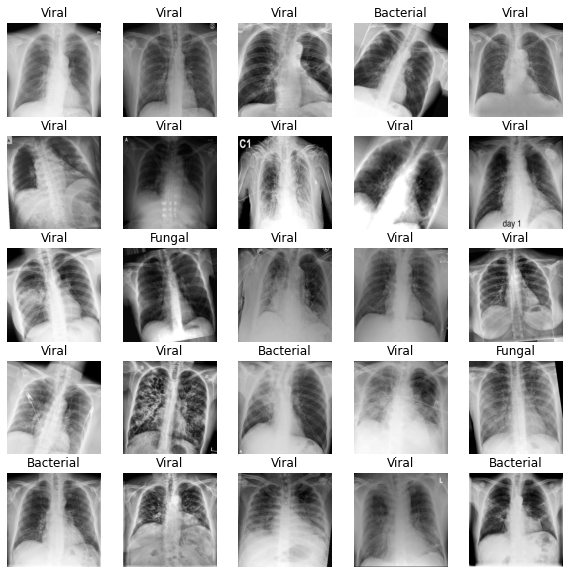

In [41]:
image_batch, label_batch = next(iter(train_ds_coarse))
show_batch(image_batch.numpy().squeeze(), label_batch.numpy())

# Train a classification network

Now that you have a dataset ready, you are steps away from training your own classification network to help detect COVID-19 cases!


*   Build your classification model and fit it.
*   Add data augmentations
*   Try to use transfer learning (https://www.tensorflow.org/tutorials/images/transfer_learning)

For each classification task think about:
*  Are you overfitted? Why? What can you do?
*  Can the classes be distinguished?
*  What are the data limits? Can we filter/process it better?
*  Is it possible that we are classifying the X-Ray machine and not the case?
*  Which task is considered more simple? Back your statement on the results, and the data distribution.

Evaluate your model using different measures:
* Confusion matrix
* Accuracy
* Precision
* Recall (Sensitivity)
* Specificity
* Plot an [Receiver operating characteristic curve](https://en.wikipedia.org/wiki/Receiver_operating_characteristic), and present the corresponding area under the curve (AUC)



**Answer the questions above here**

... 

... 

... 


In [64]:
# good one
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32,(3,3),padding='valid',activation='relu',input_shape=(512,512,1)),
    tf.keras.layers.MaxPooling2D((2, 2), strides=2),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.2), 
    tf.keras.layers.Conv2D(32,(3,3),padding='valid',activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2), strides=2),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.25), 
    tf.keras.layers.Conv2D(64,(5,5),padding='valid',activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2), strides=2),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.25), 
    tf.keras.layers.Conv2D(64,(5,5),padding='valid',activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2), strides=2),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.25), 
    tf.keras.layers.Conv2D(64,(5,5),padding='valid',activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2), strides=2),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.25), 
    tf.keras.layers.Conv2D(64,(5,5),padding='valid',activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2), strides=2),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Flatten(),


    tf.keras.layers.Dense(128, activation='relu',kernel_regularizer=tf.keras.regularizers.l2(0.005)),
    tf.keras.layers.Dense(3, activation= 'softmax') 
])

In [42]:
# change class class_weights to a dictionary so we can fit the model
class_weights_dict={v:k for v, k in enumerate(class_weights)}
class_weights_dict

{0: 2.838709677419355, 1: 0.41509433962264153, 2: 4.190476190476191}

In [43]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 510, 510, 32)      320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 255, 255, 32)      0         
_________________________________________________________________
batch_normalization (BatchNo (None, 255, 255, 32)      128       
_________________________________________________________________
dropout (Dropout)            (None, 255, 255, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 253, 253, 32)      9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 126, 126, 32)      0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 126, 126, 32)      1

In [73]:
from keras import metrics

#Compile and fit your model
model.compile(optimizer='adam',
                loss =tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True,),
                metrics=['accuracy'])

run=model.fit( train_ds_coarse, epochs=7, steps_per_epoch=30, validation_data = val_ds_coarse, validation_steps=30,class_weight=class_weights_dict)


Epoch 1/7


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/backend.py:4930: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  '"`sparse_categorical_crossentropy` received `from_logits=True`, but '


30/30 [==============================] - 10s 318ms/step - loss: 1.1021 - accuracy: 0.9062 - val_loss: 2.3050 - val_accuracy: 0.8125
Epoch 2/7
30/30 [==============================] - 9s 313ms/step - loss: 0.8253 - accuracy: 0.9583 - val_loss: 2.0523 - val_accuracy: 0.8104
Epoch 3/7
30/30 [==============================] - 9s 316ms/step - loss: 0.7087 - accuracy: 0.9646 - val_loss: 1.6546 - val_accuracy: 0.7937
Epoch 4/7
30/30 [==============================] - 9s 315ms/step - loss: 0.5891 - accuracy: 0.9875 - val_loss: 1.6401 - val_accuracy: 0.8094
Epoch 5/7
30/30 [==============================] - 9s 313ms/step - loss: 0.5064 - accuracy: 0.9885 - val_loss: 1.5295 - val_accuracy: 0.8104
Epoch 6/7
30/30 [==============================] - 9s 313ms/step - loss: 0.4416 - accuracy: 0.9896 - val_loss: 1.4567 - val_accuracy: 0.8115
Epoch 7/7
30/30 [==============================] - 9s 312ms/step - loss: 0.3948 - accuracy: 0.9833 - val_loss: 1.3296 - val_accuracy: 0.8302


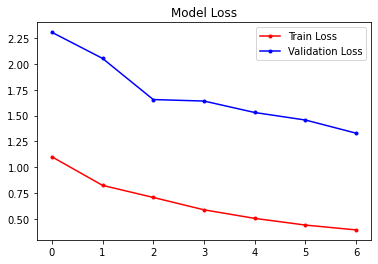

In [74]:
plt.figure()
plt.plot(run.history["loss"],'r', marker='.', label="Train Loss")
plt.plot(run.history["val_loss"],'b', marker='.', label="Validation Loss")
plt.title("Model Loss")
plt.legend()

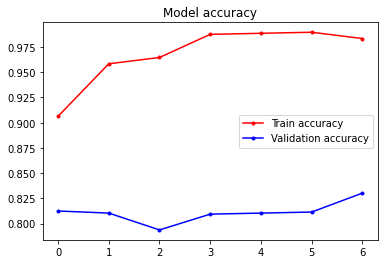

In [75]:
#Study the results and try to acheive best classification accuracy
plt.figure()
plt.plot(run.history["accuracy"],'r', marker='.', label="Train accuracy")
plt.plot(run.history["val_accuracy"],'b', marker='.', label="Validation accuracy")
plt.title("Model accuracy")
plt.legend()

In [76]:
model.evaluate(val_ds_coarse,steps=1,verbose=1)

1/1 [==============================] - 0s 107ms/step - loss: 1.5165 - accuracy: 0.8438


[1.516465187072754, 0.84375]

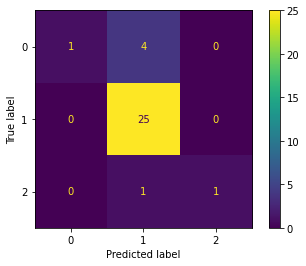

In [77]:
import sklearn
y_pred = []  # store predicted labels
y_true = []  # store true labels
raw_scoring=[]
# iterate over the dataset
for image_batch, label_batch in val_ds_coarse.take(1):   # use dataset.unbatch() with repeat
   # append true labels
   y_true.append(label_batch)
   # compute predictions
   preds = model.predict(image_batch)
   # append predicted labels
   y_pred.append(np.argmax(preds, axis = - 1))
   
   raw_scoring.append(preds)
# convert the true and predicted labels into tensors
correct_labels = tf.concat([item for item in y_true], axis = 0)
predicted_labels = tf.concat([item for item in y_pred], axis = 0)

conf_matrix = sklearn.metrics.confusion_matrix(correct_labels,predicted_labels)
                                              #  , normalize= 'all')
disp = sklearn.metrics.ConfusionMatrixDisplay(conf_matrix, range(3))
disp.plot()

In [78]:
print("recall score")
print(sklearn.metrics.recall_score(correct_labels,predicted_labels,labels=range(3),average=None))
print("precision score")
print(sklearn.metrics.precision_score(correct_labels,predicted_labels,labels=range(3),average=None,zero_division=0))

recall score
[0.2 1.  0.5]
precision score
[1.         0.83333333 1.        ]


In [79]:
# Compute ROC curve and ROC area for each class
from sklearn.metrics import roc_curve, auc,roc_auc_score 
fpr = dict()
tpr = dict()
roc_auc = dict()
for label in range(3):
  fpr[label], tpr[label],_ = roc_curve(correct_labels, predicted_labels,pos_label=label)
  roc_auc[label] = auc(fpr[label], tpr[label])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  # This is added back by InteractiveShellApp.init_path()


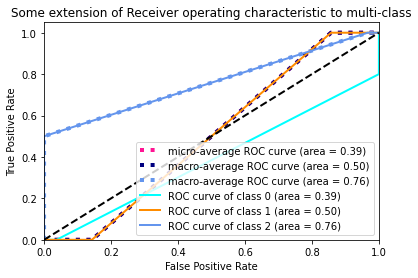

In [80]:
from scipy import interp
from itertools import cycle
lw = 2

# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(3)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(3):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= 3


# Plot all ROC curves
plt.figure()
plt.plot(fpr[1], tpr[1],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc[0]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr[1], tpr[1],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc[1]),
         color='navy', linestyle=':', linewidth=4)
plt.plot(fpr[2], tpr[2],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc[2]),
         color='cornflowerblue', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(3), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Some extension of Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
plt.show()

In [95]:
# good one
fine_model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32,(3,3),padding='valid',activation='relu',input_shape=(512,512,1)),
    tf.keras.layers.MaxPooling2D((2, 2), strides=2),
    # tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.2), 
    tf.keras.layers.Conv2D(32,(3,3),padding='valid',activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2), strides=2),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.3), 
    tf.keras.layers.Conv2D(64,(5,5),padding='valid',activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2), strides=2),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.3), 
    tf.keras.layers.Conv2D(64,(5,5),padding='valid',activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2), strides=2),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.3), 
    tf.keras.layers.Conv2D(64,(5,5),padding='valid',activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2), strides=2),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.3), 
    tf.keras.layers.Conv2D(64,(5,5),padding='valid',activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2), strides=2),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Flatten(),


    tf.keras.layers.Dense(128, activation='relu',kernel_regularizer=tf.keras.regularizers.l2(0.005)),
    tf.keras.layers.Dense(10, activation= 'softmax') 
])

In [64]:
# change class class_weights to a dictionary so we can fit the model
class_weights_fine_dict={v:k for v, k in enumerate(class_weights_fine)}
class_weights_fine_dict

{0: 0.1346938775510204,
 1: 3.7714285714285714,
 2: 6.6,
 3: 6.6,
 4: 6.6,
 5: 6.6,
 6: 1.2571428571428571,
 7: 3.3,
 8: 2.2,
 9: 6.6}

In [96]:
from keras import metrics

#Compile and fit your model
fine_model.compile(optimizer='adam',
                loss =tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True,),
                metrics=['accuracy'])

run=fine_model.fit(train_ds_fine, epochs=18, steps_per_epoch=30, validation_data = val_ds_fine, validation_steps=30,class_weight=class_weights_fine_dict)


Epoch 1/18


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/backend.py:4930: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  '"`sparse_categorical_crossentropy` received `from_logits=True`, but '


30/30 [==============================] - 10s 301ms/step - loss: 3.2779 - accuracy: 0.1688 - val_loss: 3.1402 - val_accuracy: 0.1125
Epoch 2/18
30/30 [==============================] - 9s 296ms/step - loss: 2.2421 - accuracy: 0.3187 - val_loss: 2.9837 - val_accuracy: 0.0562
Epoch 3/18
30/30 [==============================] - 9s 296ms/step - loss: 1.7367 - accuracy: 0.4385 - val_loss: 2.6419 - val_accuracy: 0.4885
Epoch 4/18
30/30 [==============================] - 9s 296ms/step - loss: 1.4019 - accuracy: 0.5917 - val_loss: 2.6651 - val_accuracy: 0.4542
Epoch 5/18
30/30 [==============================] - 9s 296ms/step - loss: 1.3123 - accuracy: 0.6594 - val_loss: 2.9514 - val_accuracy: 0.0750
Epoch 6/18
30/30 [==============================] - 9s 295ms/step - loss: 1.1768 - accuracy: 0.7417 - val_loss: 2.5707 - val_accuracy: 0.5469
Epoch 7/18
30/30 [==============================] - 9s 295ms/step - loss: 1.1794 - accuracy: 0.7052 - val_loss: 2.7812 - val_accuracy: 0.4896
Epoch 8/18
30/30

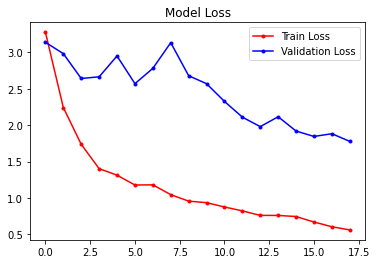

In [97]:
plt.figure()
plt.plot(run.history["loss"],'r', marker='.', label="Train Loss")
plt.plot(run.history["val_loss"],'b', marker='.', label="Validation Loss")
plt.title("Model Loss")
plt.legend()

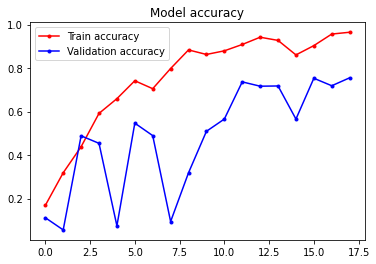

In [98]:
#Study the results and try to acheive best classification accuracy
plt.figure()
plt.plot(run.history["accuracy"],'r', marker='.', label="Train accuracy")
plt.plot(run.history["val_accuracy"],'b', marker='.', label="Validation accuracy")
plt.title("Model accuracy")
plt.legend()

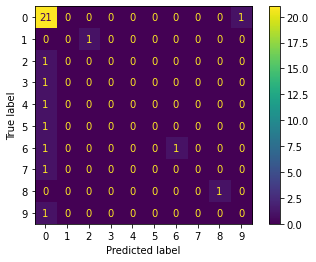

In [99]:
import sklearn
y_pred = []  # store predicted labels
y_true = []  # store true labels
raw_scoring=[]
# iterate over the dataset
for image_batch, label_batch in val_ds_fine.take(1):   # use dataset.unbatch() with repeat
   # append true labels
   y_true.append(label_batch)
   # compute predictions
   preds = fine_model.predict(image_batch)
   # append predicted labels
   y_pred.append(np.argmax(preds, axis = - 1))
   
   raw_scoring.append(preds)
# convert the true and predicted labels into tensors
correct_labels = tf.concat([item for item in y_true], axis = 0)
predicted_labels = tf.concat([item for item in y_pred], axis = 0)

conf_matrix = sklearn.metrics.confusion_matrix(correct_labels,predicted_labels)
                                              #  , normalize= 'all')
disp = sklearn.metrics.ConfusionMatrixDisplay(conf_matrix, range(10))
disp.plot()